## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analyze

hope to run over more iterations but currently just 20

In [2]:
# 10 episodes every time the model learns so average every 10 rows into 1 row
def simplify_df(df, n=10):
    # Truncate the DataFrame to a multiple of n rows (if needed)
    trimmed_df = df.iloc[:len(df) - len(df) % n]
    
    # Group by block of n rows and calculate the mean
    simplified = trimmed_df.groupby(trimmed_df.index // n).mean()
    
    return simplified

In [3]:
def graph_df(df):
    row_avg = df.drop('return', axis=1).sum(axis=1) / (df.shape[1] - 1)
    returns = df['return']
    iterations = range(len(df))

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

    # Avg Action
    axes[0].plot(iterations, row_avg, color='blue')
    axes[0].set_title("Avg Action (0=Cheap, 1=Expensive) Over Iterations")
    axes[0].set_xlabel("Iteration")
    axes[0].set_ylabel("Avg Action")
    axes[0].grid(True)

    # Return
    axes[1].plot(iterations, returns, color='red')
    axes[1].set_title("Return (reward) Over Iterations")
    axes[1].set_xlabel("Iteration")
    axes[1].set_ylabel("Return")
    axes[1].grid(True)


    plt.tight_layout()
    plt.show()


#### 25 agents

traditional agents learn the optimal choice

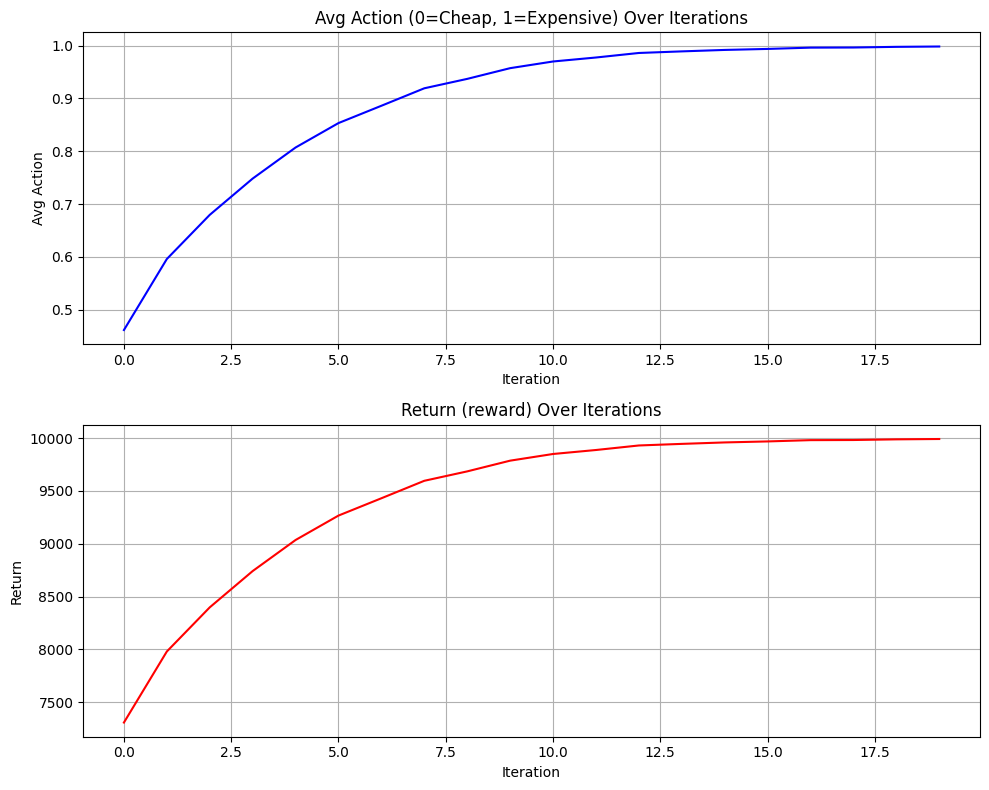

In [4]:
df = pd.read_csv("log_25_agents_[3,8][2,6].csv")
graph_df(simplify_df(df))

not traditional diners dilemma 
if everyone cooperates is more rewarding than defect but agents learn to defect than cooperate

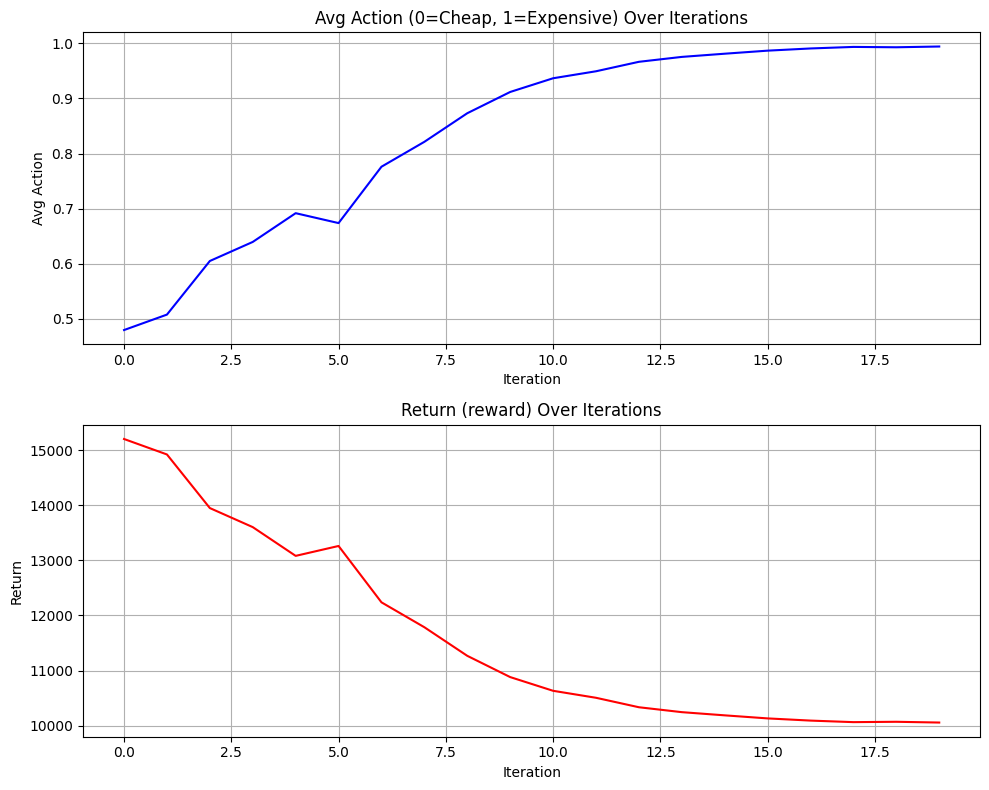

In [5]:
df_2 = pd.read_csv("log_25_agents_[6,8][2,6].csv")
graph_df(simplify_df(df_2))

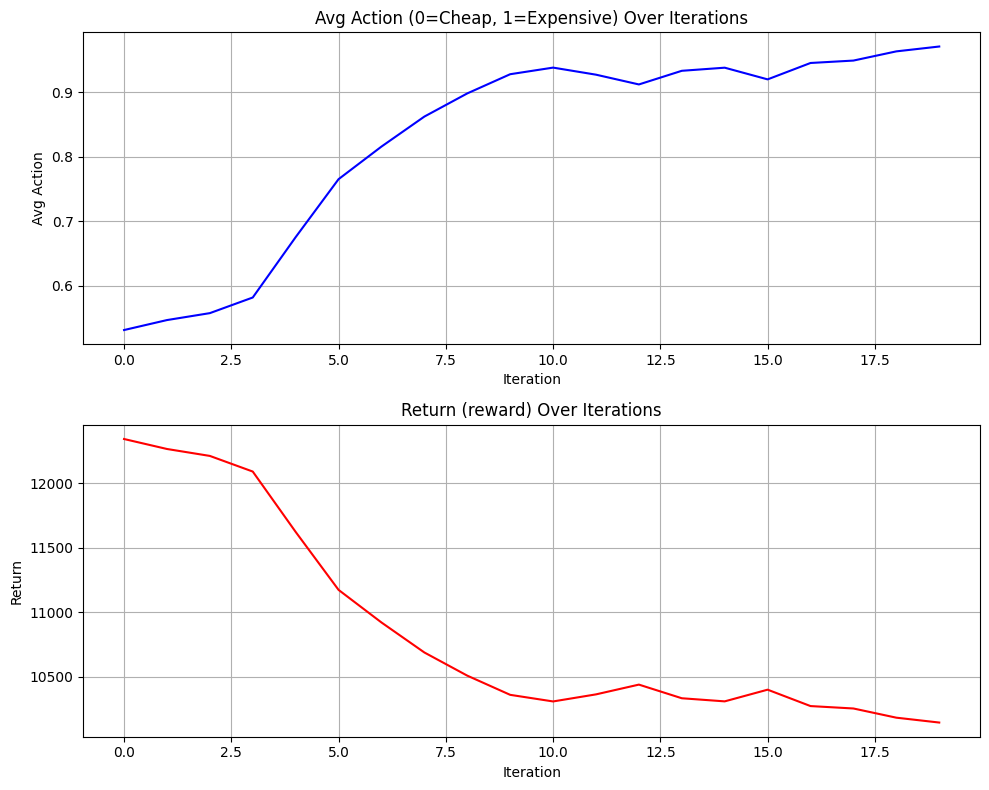

In [6]:
df_3 = pd.read_csv("log_25_agents_[7,8][4,6].csv")
graph_df(simplify_df(df_3))

different cost equal reward agents learn to buy cheaper as expected

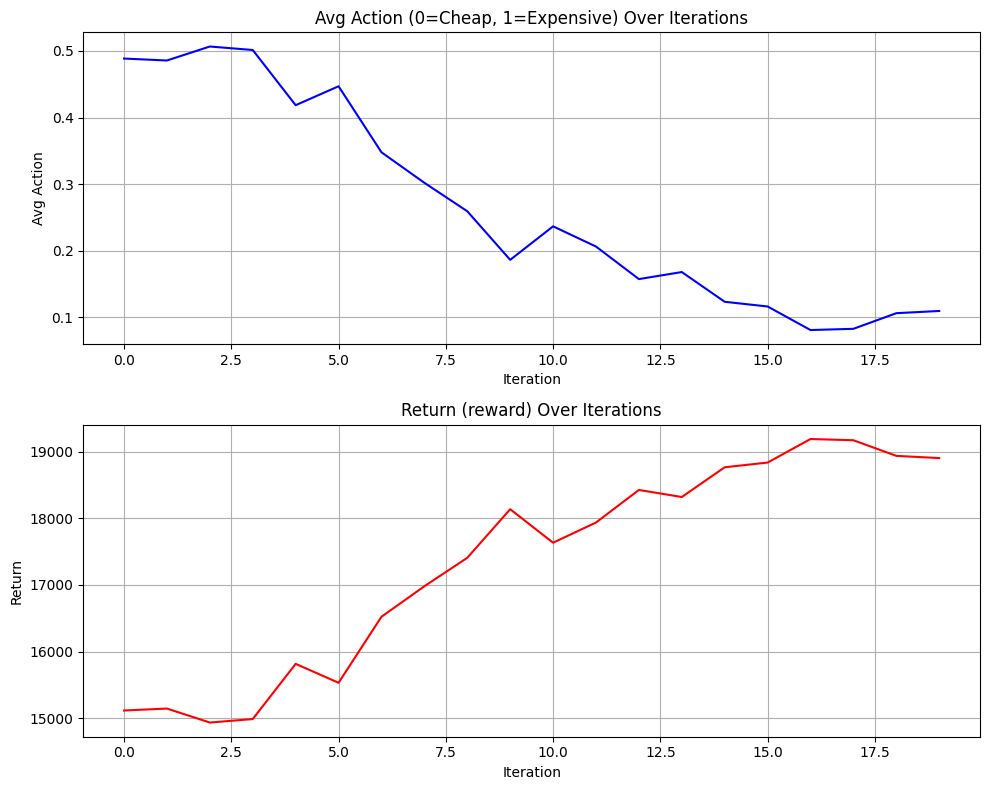

In [7]:
df_4 = pd.read_csv("log_25_agents_[8,8][4,6].csv")
graph_df(simplify_df(df_4))

#### 5 agents

traditional

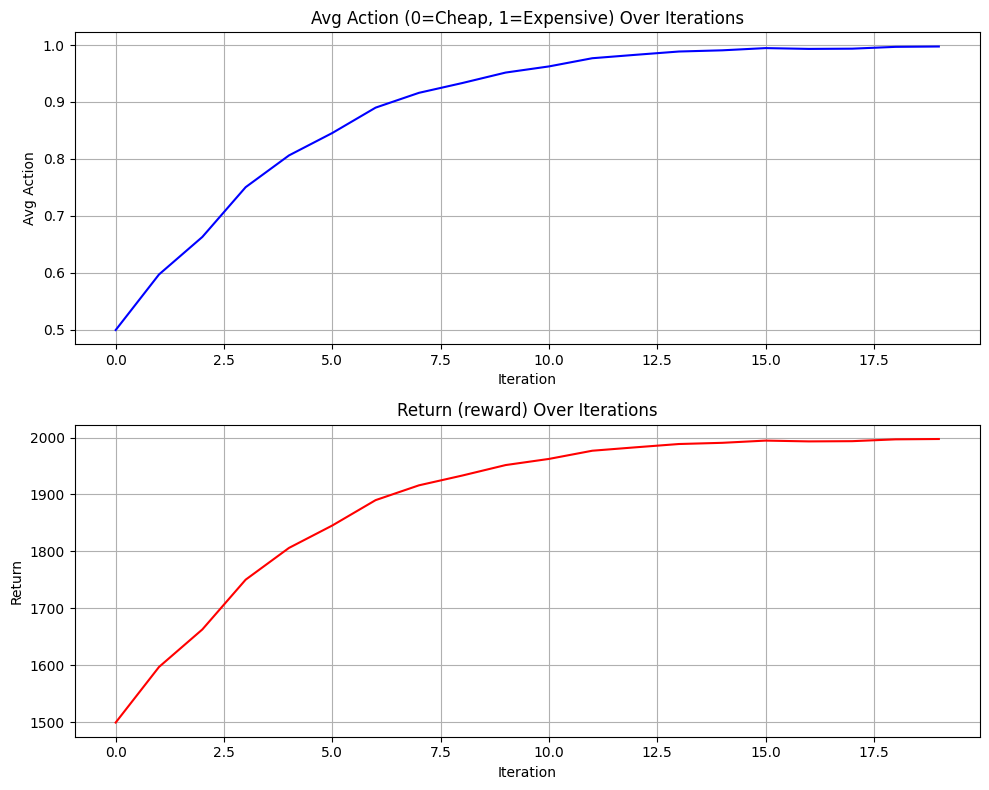

In [8]:
df_5 = pd.read_csv("log_5_agents_[3,8][2,6].csv")
graph_df(simplify_df(df_5))

not traditional

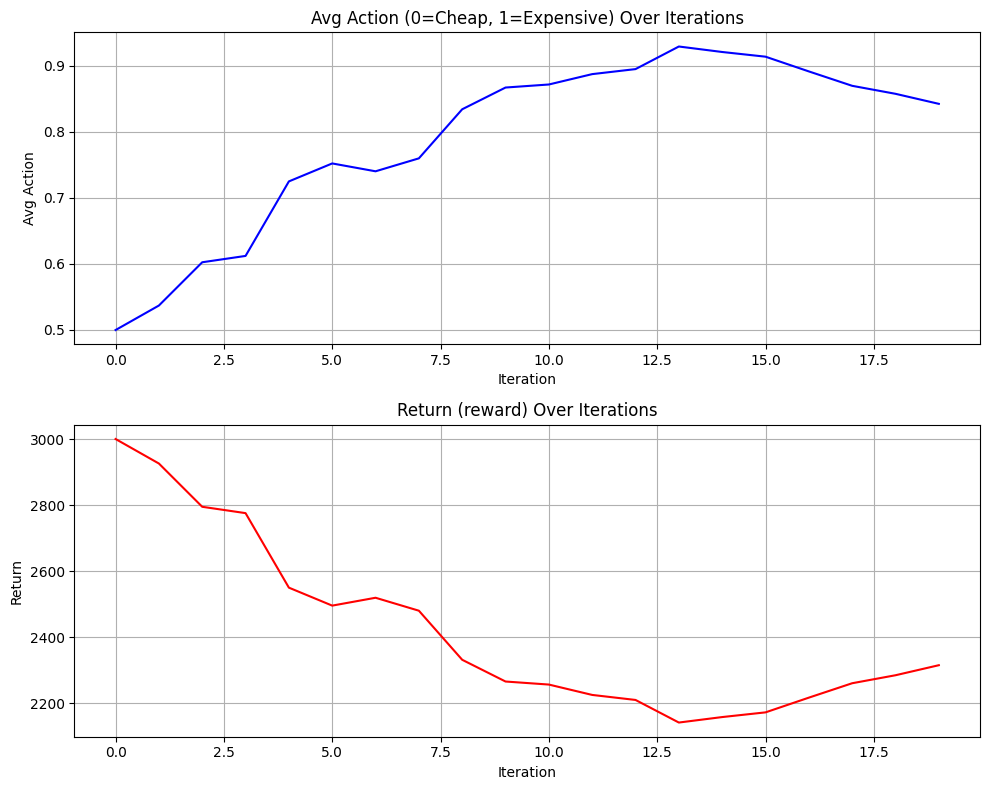

In [9]:
df_6 = pd.read_csv("log_5_agents_[6,8][2,6].csv")
graph_df(simplify_df(df_6))

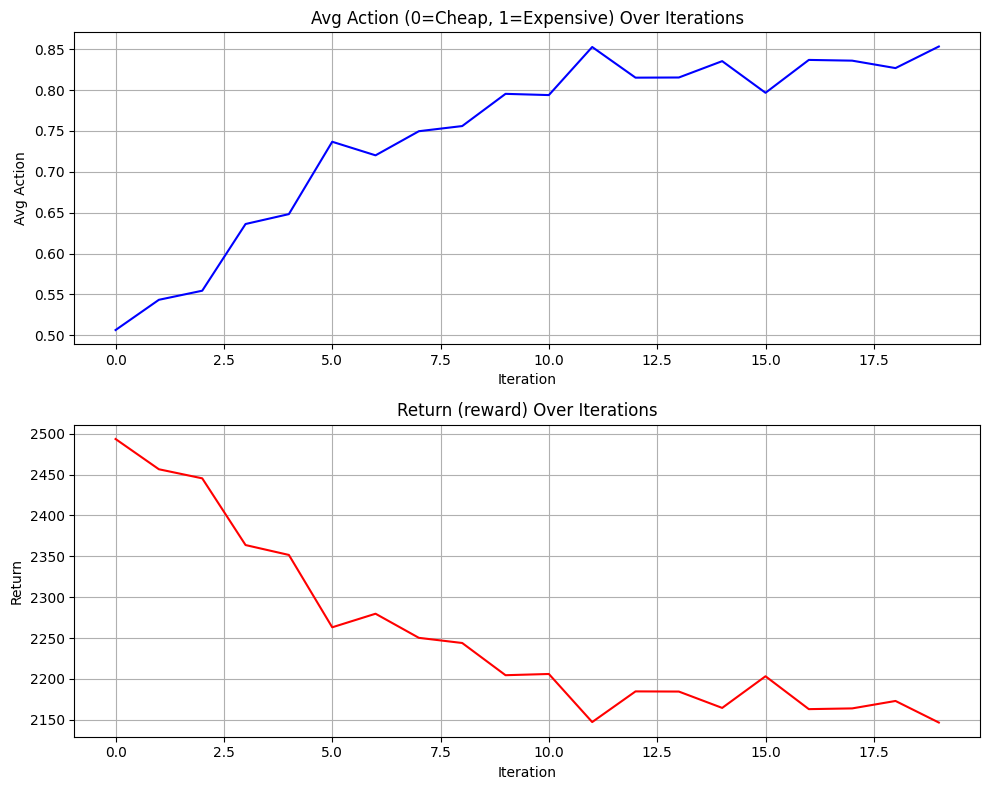

In [10]:
df_7 = pd.read_csv("log_5_agents_[7,8][4,6].csv")
graph_df(simplify_df(df_7))

#### 2 agents

traditional

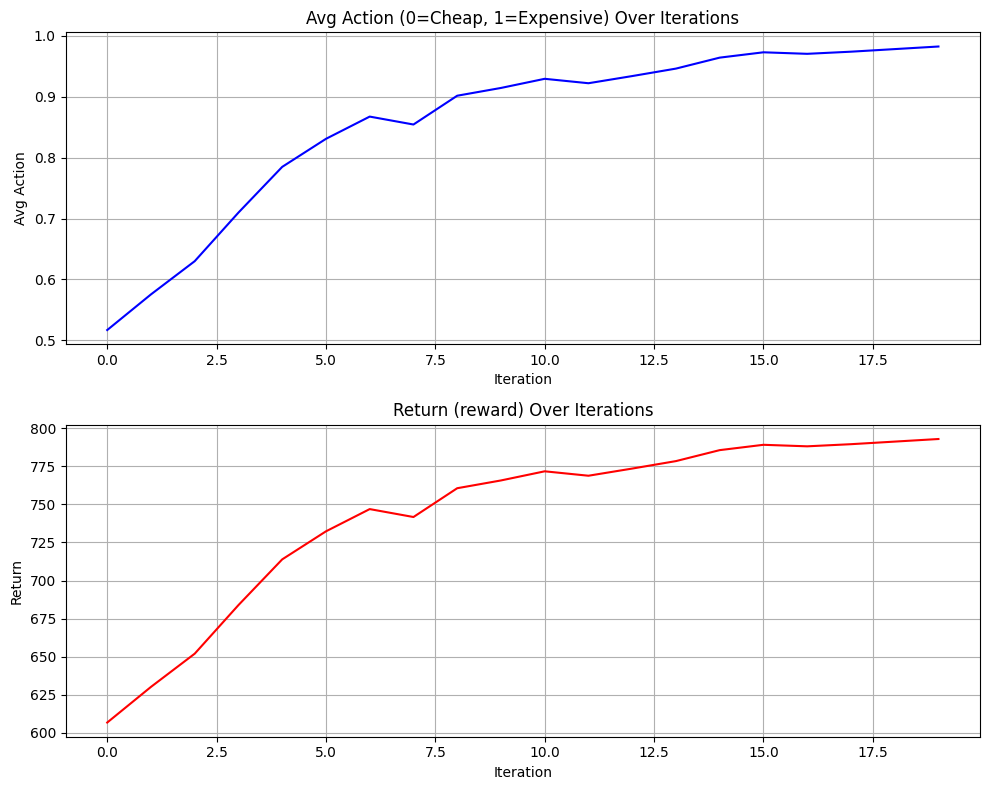

In [11]:
df_8 = pd.read_csv("log_2_agents_[3,8][2,6].csv")
graph_df(simplify_df(df_8))

not traditional

it seems that the less agents there are the more cooperative (buy cheap) they are which is similar to human behavior when splitting the bill

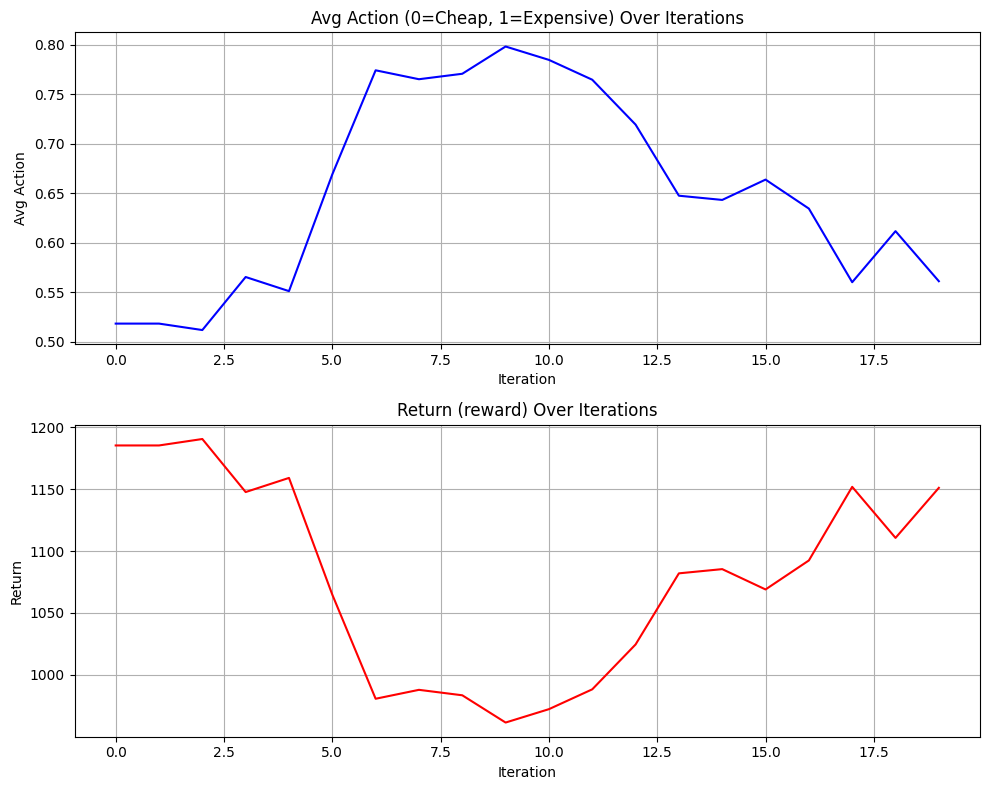

In [13]:
df_9 = pd.read_csv("log_2_agents_[6,8][2,6].csv")
graph_df(simplify_df(df_9))